In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from tensorflow.keras.datasets import fashion_mnist

In [6]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [7]:
x_train = x_train.reshape(60000, 28, 28, 1) / 255 #告知我們只有1個channel

In [8]:
x_test = x_test.reshape(10000, 28, 28, 1) / 255

In [9]:
x_train.shape #檢查shape

(60000, 28, 28, 1)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

### 讀入必要函式

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras.optimizers import SGD

### Step1.打造函數學習機

In [14]:
model = Sequential()

In [16]:
model.add(Conv2D(32, (3,3), padding = "same", #取2倍數的filter數量
                input_shape=(28, 28, 1),
                activation = "relu"))

In [17]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [18]:
model.add(Conv2D(64, (3,3), padding = "same",
                activation = "relu"))

In [19]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [20]:
model.add(Conv2D(128, (3,3), padding = "same",
                activation = "relu"))

In [21]:
model.add(MaxPooling2D(pool_size = (2, 2)))

In [22]:
model.add(Flatten()) #拉平

In [23]:
model.add(Dense(75, activation = "relu"))

In [24]:
model.add(Dense(10, activation = "softmax")) 
#最後的輸出格式需固定; 10個數字且相加為1 (softmax)

### 檢視神經網路

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 128)         0

In [26]:
(3*3+1)*32 #驗證summary中第一層所需要調整的參數

320

### Step2.組裝神經網路

In [27]:
model.compile(loss="mse", optimizer=SGD(lr=0.3), metrics=["accuracy"])

### Step3. fit/訓練

In [28]:
model.fit(x_train, y_train, batch_size=140, epochs=15)

Epoch 1/15
60000/60000 [==============================] - 117s 2ms/sample - loss: 0.0776 - acc: 0.4193
Epoch 2/15
60000/60000 [==============================] - 87s 1ms/sample - loss: 0.0383 - acc: 0.7240
Epoch 3/15
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.0306 - acc: 0.7861
Epoch 4/15
60000/60000 [==============================] - 83s 1ms/sample - loss: 0.0265 - acc: 0.8165
Epoch 5/15
60000/60000 [==============================] - 84s 1ms/sample - loss: 0.0240 - acc: 0.8333
Epoch 6/15
60000/60000 [==============================] - 84s 1ms/sample - loss: 0.0219 - acc: 0.8475
Epoch 7/15
60000/60000 [==============================] - 84s 1ms/sample - loss: 0.0206 - acc: 0.8575
Epoch 8/15
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.0194 - acc: 0.8659
Epoch 9/15
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.0186 - acc: 0.8735
Epoch 10/15
60000/60000 [==============================] - 86s 1ms/sample - loss:

### Step4.預測

In [30]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [31]:
result = model.predict_classes(x_test)

In [32]:
def CNN_predict(n):
    print("CNN的預測是：", class_names[result[n]])
    X = x_test[n].reshape(28, 28)
    plt.imshow(X, cmap = "Reds")

CNN的預測是： Ankle Boot


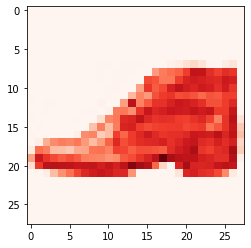

In [33]:
CNN_predict(456)

### Step5.檢查是否有背答案的傾向

In [34]:
score = model.evaluate(x_test, y_test)

10000/10000 [==============================] - 3s 312us/sample - loss: 0.0211 - acc: 0.8542


In [35]:
loss, acc = score

In [36]:
print("測試資料的正確率為：", acc)

測試資料的正確率為： 0.8542


### Step6.將model存起來

In [37]:
model.save("myCNNmodel.h5")

### 修正項目與觀察：
1. filter數量調整為(32,64,128)
2. 修正送進全連結神經網路的神經元數目:75
3. 調高learning rate: 0.087→0.3
4. 調高batch_size: 128→140
5. 調高訓練次數epochs: 12→15
##### 小結: 將lr,batch_size,epochs皆調高，卻不代表準確率一定會上升(甚至不到90%)
6. 將顏色由灰階調整成紅色
7. 由測試資料的正確率可以發現略低於訓練資料，說明可能有背答案的傾向